In [1]:
# Import libraries
import numpy as np
from scipy.linalg import eigh
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set MD parameters
MDstep = 10000000 # 20 ns
interval = 20
temp = 310
delta = 0.002

In [3]:
# Setup and run a MD simulation of alanine dipeptide
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

prmtop = AmberPrmtopFile('inputs/adip.prmtop')
inpcrd = AmberInpcrdFile('inputs/adip.inpcrd')
system = prmtop.createSystem(implicitSolvent=GBn, nonbondedCutoff=1 * nanometer,
        constraints=HBonds)
integrator = LangevinIntegrator(temp * kelvin, 1 / picosecond, delta * picoseconds)
simulation = Simulation(prmtop.topology, system, integrator)
simulation.context.setPositions(inpcrd.positions)
if inpcrd.boxVectors is not None:
    simulation.context.setPeriodicBoxVectors(*inpcrd.boxVectors)
simulation.minimizeEnergy()
#simulation.reporters.append(PDBReporter('outputs/output.pdb', interval)) # Fix it
#simulation.reporters.append(DCDReporter('outputs/output.dcd', interval))
#simulation.reporters.append(StateDataReporter('outputs/stdout', interval, step=True,
#        potentialEnergy=True, temperature=True))
#simulation.step(MDstep)

In [4]:
# Convert DCD format to PDB format, and write each frame to separate files.
import pytraj as pt

traj = pt.load('../save/md-alanine-dipeptide/outputs/output.dcd', top='inputs/adip.prmtop')
pt.write_traj('../save/md-alanine-dipeptide/outputs/dcd_convert.pdb', traj.superpose(mass=True), overwrite=True, options='multi')

In [5]:
# Visualize the conformations
#import pytraj as pt
#import nglview as nv

#traj = pt.load('outputs/output.dcd', top='inputs/adip.prmtop')
#view = nv.show_pytraj(traj)
#view.add_representation('licorice')
#view

In [8]:
#  Calculate potential energies from each frame
pe_list = []
unit = kilojoule / mole
for i in range(1, int(MDstep / interval), 100):
    filename = '../save/md-alanine-dipeptide/outputs/dcd_convert.pdb.%d' % i
    pdb = PDBFile(filename)
    simulation.context.setPositions(pdb.getPositions())
    state = simulation.context.getState(getEnergy=True)
    pe_list.append(state.getPotentialEnergy() / unit)
    print(i, state.getPotentialEnergy())

1 -139.47357177734375 kJ/mol
101 -83.67153930664062 kJ/mol
201 -90.24578857421875 kJ/mol
301 -74.55902099609375 kJ/mol
401 -107.94210815429688 kJ/mol
501 -84.58392333984375 kJ/mol
601 -63.877227783203125 kJ/mol
701 -86.5657958984375 kJ/mol
801 -86.30673217773438 kJ/mol
901 -53.60064697265625 kJ/mol
1001 -87.47088623046875 kJ/mol
1101 -82.13385009765625 kJ/mol
1201 -78.77081298828125 kJ/mol
1301 -45.599609375 kJ/mol
1401 -70.79534912109375 kJ/mol
1501 -90.63253784179688 kJ/mol
1601 -88.91607666015625 kJ/mol
1701 -87.58883666992188 kJ/mol
1801 -89.0615234375 kJ/mol
1901 -73.6649169921875 kJ/mol
2001 -86.58575439453125 kJ/mol
2101 -97.01895141601562 kJ/mol
2201 -77.12557983398438 kJ/mol
2301 -64.37722778320312 kJ/mol
2401 -63.892486572265625 kJ/mol
2501 -81.50726318359375 kJ/mol
2601 -77.94271850585938 kJ/mol
2701 -94.77401733398438 kJ/mol
2801 -56.196044921875 kJ/mol
2901 -89.908935546875 kJ/mol
3001 -72.17044067382812 kJ/mol
3101 -67.1044921875 kJ/mol
3201 -56.164031982421875 kJ/mol
330

26501 -95.54989624023438 kJ/mol
26601 -87.90859985351562 kJ/mol
26701 -66.36712646484375 kJ/mol
26801 -72.69216918945312 kJ/mol
26901 -72.61236572265625 kJ/mol
27001 -83.5980224609375 kJ/mol
27101 -89.22628784179688 kJ/mol
27201 -95.22354125976562 kJ/mol
27301 -86.85507202148438 kJ/mol
27401 -73.90829467773438 kJ/mol
27501 -85.71890258789062 kJ/mol
27601 -58.1541748046875 kJ/mol
27701 -83.02569580078125 kJ/mol
27801 -84.39202880859375 kJ/mol
27901 -83.1375732421875 kJ/mol
28001 -91.39559936523438 kJ/mol
28101 -81.26385498046875 kJ/mol
28201 -81.83444213867188 kJ/mol
28301 -93.44271850585938 kJ/mol
28401 -73.93960571289062 kJ/mol
28501 -91.02871704101562 kJ/mol
28601 -74.56826782226562 kJ/mol
28701 -88.21005249023438 kJ/mol
28801 -59.276702880859375 kJ/mol
28901 -77.9482421875 kJ/mol
29001 -83.57623291015625 kJ/mol
29101 -76.98675537109375 kJ/mol
29201 -83.96990966796875 kJ/mol
29301 -67.24722290039062 kJ/mol
29401 -70.67129516601562 kJ/mol
29501 -71.07962036132812 kJ/mol
29601 -93.2261

54001 -93.50323486328125 kJ/mol
54101 -88.2501220703125 kJ/mol
54201 -87.09994506835938 kJ/mol
54301 -96.5130615234375 kJ/mol
54401 -98.67379760742188 kJ/mol
54501 -82.037353515625 kJ/mol
54601 -79.05221557617188 kJ/mol
54701 -80.6680908203125 kJ/mol
54801 -87.33114624023438 kJ/mol
54901 -83.69882202148438 kJ/mol
55001 -64.40341186523438 kJ/mol
55101 -88.09036254882812 kJ/mol
55201 -73.334228515625 kJ/mol
55301 -87.9058837890625 kJ/mol
55401 -90.71005249023438 kJ/mol
55501 -76.6842041015625 kJ/mol
55601 -69.62576293945312 kJ/mol
55701 -65.69134521484375 kJ/mol
55801 -75.31869506835938 kJ/mol
55901 -92.553955078125 kJ/mol
56001 -62.023468017578125 kJ/mol
56101 -64.5484619140625 kJ/mol
56201 -82.37945556640625 kJ/mol
56301 -91.327392578125 kJ/mol
56401 -75.46942138671875 kJ/mol
56501 -77.42282104492188 kJ/mol
56601 -85.69021606445312 kJ/mol
56701 -73.58474731445312 kJ/mol
56801 -70.93896484375 kJ/mol
56901 -76.52862548828125 kJ/mol
57001 -81.6329345703125 kJ/mol
57101 -87.11883544921875 

81501 -81.68209838867188 kJ/mol
81601 -84.65985107421875 kJ/mol
81701 -70.05728149414062 kJ/mol
81801 -77.89651489257812 kJ/mol
81901 -83.36358642578125 kJ/mol
82001 -64.94512939453125 kJ/mol
82101 -76.18310546875 kJ/mol
82201 -63.977783203125 kJ/mol
82301 -69.7353515625 kJ/mol
82401 -93.95553588867188 kJ/mol
82501 -55.531005859375 kJ/mol
82601 -87.92340087890625 kJ/mol
82701 -76.98580932617188 kJ/mol
82801 -51.172637939453125 kJ/mol
82901 -90.59951782226562 kJ/mol
83001 -79.6285400390625 kJ/mol
83101 -87.68963623046875 kJ/mol
83201 -62.62469482421875 kJ/mol
83301 -73.888427734375 kJ/mol
83401 -64.15142822265625 kJ/mol
83501 -84.60110473632812 kJ/mol
83601 -80.309326171875 kJ/mol
83701 -60.978973388671875 kJ/mol
83801 -87.52084350585938 kJ/mol
83901 -73.45404052734375 kJ/mol
84001 -86.37417602539062 kJ/mol
84101 -69.26510620117188 kJ/mol
84201 -77.98910522460938 kJ/mol
84301 -88.79876708984375 kJ/mol
84401 -58.682403564453125 kJ/mol
84501 -82.6898193359375 kJ/mol
84601 -92.338134765625

109101 -73.34954833984375 kJ/mol
109201 -68.293212890625 kJ/mol
109301 -77.90582275390625 kJ/mol
109401 -88.85992431640625 kJ/mol
109501 -92.15621948242188 kJ/mol
109601 -79.48272705078125 kJ/mol
109701 -81.14865112304688 kJ/mol
109801 -49.41009521484375 kJ/mol
109901 -104.35003662109375 kJ/mol
110001 -65.41946411132812 kJ/mol
110101 -65.90328979492188 kJ/mol
110201 -90.85650634765625 kJ/mol
110301 -94.55770874023438 kJ/mol
110401 -92.96832275390625 kJ/mol
110501 -61.05322265625 kJ/mol
110601 -83.86593627929688 kJ/mol
110701 -86.38555908203125 kJ/mol
110801 -97.05227661132812 kJ/mol
110901 -67.33135986328125 kJ/mol
111001 -89.24874877929688 kJ/mol
111101 -68.78179931640625 kJ/mol
111201 -73.94509887695312 kJ/mol
111301 -90.86935424804688 kJ/mol
111401 -32.164276123046875 kJ/mol
111501 -83.184326171875 kJ/mol
111601 -73.31793212890625 kJ/mol
111701 -92.96939086914062 kJ/mol
111801 -106.87979125976562 kJ/mol
111901 -40.904693603515625 kJ/mol
112001 -82.34991455078125 kJ/mol
112101 -79.20

135401 -107.24578857421875 kJ/mol
135501 -86.0570068359375 kJ/mol
135601 -93.2330322265625 kJ/mol
135701 -65.89019775390625 kJ/mol
135801 -101.20013427734375 kJ/mol
135901 -85.51702880859375 kJ/mol
136001 -83.72409057617188 kJ/mol
136101 -54.384796142578125 kJ/mol
136201 -77.7440185546875 kJ/mol
136301 -89.16476440429688 kJ/mol
136401 -76.36712646484375 kJ/mol
136501 -86.60861206054688 kJ/mol
136601 -58.8829345703125 kJ/mol
136701 -81.7823486328125 kJ/mol
136801 -89.95355224609375 kJ/mol
136901 -72.25018310546875 kJ/mol
137001 -54.661468505859375 kJ/mol
137101 -81.33401489257812 kJ/mol
137201 -93.49575805664062 kJ/mol
137301 -61.315704345703125 kJ/mol
137401 -85.230712890625 kJ/mol
137501 -83.21942138671875 kJ/mol
137601 -83.06011962890625 kJ/mol
137701 -53.859771728515625 kJ/mol
137801 -73.61459350585938 kJ/mol
137901 -73.33084106445312 kJ/mol
138001 -81.88284301757812 kJ/mol
138101 -64.02337646484375 kJ/mol
138201 -64.85516357421875 kJ/mol
138301 -69.307373046875 kJ/mol
138401 -99.35

161401 -77.34445190429688 kJ/mol
161501 -87.41754150390625 kJ/mol
161601 -73.1798095703125 kJ/mol
161701 -75.41403198242188 kJ/mol
161801 -81.99456787109375 kJ/mol
161901 -72.24053955078125 kJ/mol
162001 -86.8587646484375 kJ/mol
162101 -76.05587768554688 kJ/mol
162201 -75.02630615234375 kJ/mol
162301 -80.68270874023438 kJ/mol
162401 -74.55877685546875 kJ/mol
162501 -85.79855346679688 kJ/mol
162601 -50.743194580078125 kJ/mol
162701 -80.00973510742188 kJ/mol
162801 -81.73175048828125 kJ/mol
162901 -87.59658813476562 kJ/mol
163001 -61.07342529296875 kJ/mol
163101 -85.0145263671875 kJ/mol
163201 -76.90255737304688 kJ/mol
163301 -74.9366455078125 kJ/mol
163401 -67.92141723632812 kJ/mol
163501 -65.859619140625 kJ/mol
163601 -67.68524169921875 kJ/mol
163701 -89.69595336914062 kJ/mol
163801 -71.214599609375 kJ/mol
163901 -97.5704345703125 kJ/mol
164001 -70.45648193359375 kJ/mol
164101 -65.17742919921875 kJ/mol
164201 -66.43722534179688 kJ/mol
164301 -74.539306640625 kJ/mol
164401 -80.367645263

186501 -83.03451538085938 kJ/mol
186601 -72.38021850585938 kJ/mol
186701 -86.34503173828125 kJ/mol
186801 -80.9024658203125 kJ/mol
186901 -78.68154907226562 kJ/mol
187001 -92.6578369140625 kJ/mol
187101 -86.30511474609375 kJ/mol
187201 -81.7303466796875 kJ/mol
187301 -73.34649658203125 kJ/mol
187401 -78.51043701171875 kJ/mol
187501 -88.25775146484375 kJ/mol
187601 -84.5782470703125 kJ/mol
187701 -83.95785522460938 kJ/mol
187801 -76.40594482421875 kJ/mol
187901 -79.76028442382812 kJ/mol
188001 -100.88967895507812 kJ/mol
188101 -74.56893920898438 kJ/mol
188201 -94.6539306640625 kJ/mol
188301 -46.390777587890625 kJ/mol
188401 -55.808319091796875 kJ/mol
188501 -69.01895141601562 kJ/mol
188601 -66.91387939453125 kJ/mol
188701 -84.74661254882812 kJ/mol
188801 -102.56564331054688 kJ/mol
188901 -96.78793334960938 kJ/mol
189001 -57.001251220703125 kJ/mol
189101 -70.29766845703125 kJ/mol
189201 -61.14111328125 kJ/mol
189301 -94.79580688476562 kJ/mol
189401 -44.49798583984375 kJ/mol
189501 -69.04

213501 -81.26419067382812 kJ/mol
213601 -79.26992797851562 kJ/mol
213701 -66.7730712890625 kJ/mol
213801 -61.87335205078125 kJ/mol
213901 -95.64041137695312 kJ/mol
214001 -84.02883911132812 kJ/mol
214101 -69.55209350585938 kJ/mol
214201 -76.14801025390625 kJ/mol
214301 -73.24673461914062 kJ/mol
214401 -99.5416259765625 kJ/mol
214501 -86.53375244140625 kJ/mol
214601 -46.477752685546875 kJ/mol
214701 -83.35250854492188 kJ/mol
214801 -91.81845092773438 kJ/mol
214901 -68.9410400390625 kJ/mol
215001 -67.90972900390625 kJ/mol
215101 -59.163543701171875 kJ/mol
215201 -96.08322143554688 kJ/mol
215301 -90.0863037109375 kJ/mol
215401 -66.19976806640625 kJ/mol
215501 -77.4554443359375 kJ/mol
215601 -75.61444091796875 kJ/mol
215701 -85.60458374023438 kJ/mol
215801 -82.42501831054688 kJ/mol
215901 -90.9735107421875 kJ/mol
216001 -94.98709106445312 kJ/mol
216101 -78.79690551757812 kJ/mol
216201 -70.53515625 kJ/mol
216301 -101.5797119140625 kJ/mol
216401 -74.68972778320312 kJ/mol
216501 -50.021057128

239801 -87.25909423828125 kJ/mol
239901 -67.2576904296875 kJ/mol
240001 -52.046875 kJ/mol
240101 -83.892333984375 kJ/mol
240201 -84.68597412109375 kJ/mol
240301 -65.622314453125 kJ/mol
240401 -105.66204833984375 kJ/mol
240501 -88.35848999023438 kJ/mol
240601 -104.154052734375 kJ/mol
240701 -88.9100341796875 kJ/mol
240801 -89.01971435546875 kJ/mol
240901 -67.47238159179688 kJ/mol
241001 -89.15219116210938 kJ/mol
241101 -88.89459228515625 kJ/mol
241201 -83.08590698242188 kJ/mol
241301 -101.5418701171875 kJ/mol
241401 -91.72409057617188 kJ/mol
241501 -76.42486572265625 kJ/mol
241601 -77.60836791992188 kJ/mol
241701 -78.61636352539062 kJ/mol
241801 -102.7138671875 kJ/mol
241901 -84.45907592773438 kJ/mol
242001 -99.3519287109375 kJ/mol
242101 -67.85150146484375 kJ/mol
242201 -63.520263671875 kJ/mol
242301 -79.48342895507812 kJ/mol
242401 -71.29324340820312 kJ/mol
242501 -69.53414916992188 kJ/mol
242601 -89.41934204101562 kJ/mol
242701 -89.22479248046875 kJ/mol
242801 -88.18722534179688 kJ/m

266201 -50.21771240234375 kJ/mol
266301 -72.16522216796875 kJ/mol
266401 -79.81097412109375 kJ/mol
266501 -82.75811767578125 kJ/mol
266601 -70.32098388671875 kJ/mol
266701 -59.19415283203125 kJ/mol
266801 -78.43182373046875 kJ/mol
266901 -67.2113037109375 kJ/mol
267001 -84.33477783203125 kJ/mol
267101 -85.67950439453125 kJ/mol
267201 -77.37753295898438 kJ/mol
267301 -42.813140869140625 kJ/mol
267401 -88.48956298828125 kJ/mol
267501 -55.33587646484375 kJ/mol
267601 -84.44033813476562 kJ/mol
267701 -82.08047485351562 kJ/mol
267801 -78.0611572265625 kJ/mol
267901 -79.65304565429688 kJ/mol
268001 -86.92501831054688 kJ/mol
268101 -55.0155029296875 kJ/mol
268201 -83.4515380859375 kJ/mol
268301 -65.38967895507812 kJ/mol
268401 -73.04583740234375 kJ/mol
268501 -65.44415283203125 kJ/mol
268601 -68.9456787109375 kJ/mol
268701 -77.28909301757812 kJ/mol
268801 -83.32998657226562 kJ/mol
268901 -82.54486083984375 kJ/mol
269001 -84.367431640625 kJ/mol
269101 -77.84158325195312 kJ/mol
269201 -68.41445

292901 -88.56753540039062 kJ/mol
293001 -74.81378173828125 kJ/mol
293101 -89.53131103515625 kJ/mol
293201 -76.59716796875 kJ/mol
293301 -82.10623168945312 kJ/mol
293401 -53.456085205078125 kJ/mol
293501 -67.93045043945312 kJ/mol
293601 -82.62216186523438 kJ/mol
293701 -71.20343017578125 kJ/mol
293801 -77.57122802734375 kJ/mol
293901 -76.80160522460938 kJ/mol
294001 -69.69522094726562 kJ/mol
294101 -75.8316650390625 kJ/mol
294201 -90.98910522460938 kJ/mol
294301 -87.38436889648438 kJ/mol
294401 -59.54058837890625 kJ/mol
294501 -72.28387451171875 kJ/mol
294601 -80.81402587890625 kJ/mol
294701 -80.42953491210938 kJ/mol
294801 -80.05215454101562 kJ/mol
294901 -76.1339111328125 kJ/mol
295001 -95.96755981445312 kJ/mol
295101 -90.5921630859375 kJ/mol
295201 -80.7154541015625 kJ/mol
295301 -74.3988037109375 kJ/mol
295401 -74.15179443359375 kJ/mol
295501 -80.86361694335938 kJ/mol
295601 -89.63589477539062 kJ/mol
295701 -61.37591552734375 kJ/mol
295801 -60.1822509765625 kJ/mol
295901 -62.6473388

318301 -46.2730712890625 kJ/mol
318401 -89.15887451171875 kJ/mol
318501 -75.4302978515625 kJ/mol
318601 -73.74789428710938 kJ/mol
318701 -83.4091796875 kJ/mol
318801 -72.56991577148438 kJ/mol
318901 -59.052093505859375 kJ/mol
319001 -65.72784423828125 kJ/mol
319101 -62.828582763671875 kJ/mol
319201 -74.57598876953125 kJ/mol
319301 -81.8203125 kJ/mol
319401 -49.377777099609375 kJ/mol
319501 -62.55078125 kJ/mol
319601 -61.15704345703125 kJ/mol
319701 -65.1201171875 kJ/mol
319801 -84.21893310546875 kJ/mol
319901 -63.80474853515625 kJ/mol
320001 -54.951202392578125 kJ/mol
320101 -72.83248901367188 kJ/mol
320201 -69.11166381835938 kJ/mol
320301 -90.78729248046875 kJ/mol
320401 -81.11599731445312 kJ/mol
320501 -82.66891479492188 kJ/mol
320601 -73.1143798828125 kJ/mol
320701 -70.71124267578125 kJ/mol
320801 -76.8380126953125 kJ/mol
320901 -36.4462890625 kJ/mol
321001 -87.387451171875 kJ/mol
321101 -66.19549560546875 kJ/mol
321201 -62.4312744140625 kJ/mol
321301 -89.08355712890625 kJ/mol
32140

343801 -79.60830688476562 kJ/mol
343901 -88.42996215820312 kJ/mol
344001 -93.20919799804688 kJ/mol
344101 -77.89788818359375 kJ/mol
344201 -66.86361694335938 kJ/mol
344301 -84.38250732421875 kJ/mol
344401 -101.3790283203125 kJ/mol
344501 -63.484954833984375 kJ/mol
344601 -87.52597045898438 kJ/mol
344701 -98.01889038085938 kJ/mol
344801 -89.73504638671875 kJ/mol
344901 -63.9765625 kJ/mol
345001 -84.9720458984375 kJ/mol
345101 -79.3289794921875 kJ/mol
345201 -74.49298095703125 kJ/mol
345301 -95.94317626953125 kJ/mol
345401 -67.91055297851562 kJ/mol
345501 -82.6309814453125 kJ/mol
345601 -64.47052001953125 kJ/mol
345701 -76.98236083984375 kJ/mol
345801 -75.58065795898438 kJ/mol
345901 -91.35791015625 kJ/mol
346001 -95.24664306640625 kJ/mol
346101 -87.70782470703125 kJ/mol
346201 -74.90576171875 kJ/mol
346301 -67.16427612304688 kJ/mol
346401 -67.77212524414062 kJ/mol
346501 -66.17727661132812 kJ/mol
346601 -94.18890380859375 kJ/mol
346701 -77.81997680664062 kJ/mol
346801 -60.49435424804687

371301 -85.84036254882812 kJ/mol
371401 -90.40231323242188 kJ/mol
371501 -91.3575439453125 kJ/mol
371601 -92.5872802734375 kJ/mol
371701 -96.04855346679688 kJ/mol
371801 -102.24774169921875 kJ/mol
371901 -71.24044799804688 kJ/mol
372001 -79.78097534179688 kJ/mol
372101 -91.13406372070312 kJ/mol
372201 -71.20687866210938 kJ/mol
372301 -76.62429809570312 kJ/mol
372401 -71.13919067382812 kJ/mol
372501 -75.50048828125 kJ/mol
372601 -103.86544799804688 kJ/mol
372701 -88.42330932617188 kJ/mol
372801 -83.43310546875 kJ/mol
372901 -70.65786743164062 kJ/mol
373001 -95.25506591796875 kJ/mol
373101 -107.19125366210938 kJ/mol
373201 -85.15054321289062 kJ/mol
373301 -75.23199462890625 kJ/mol
373401 -75.47592163085938 kJ/mol
373501 -67.53311157226562 kJ/mol
373601 -99.23275756835938 kJ/mol
373701 -77.3421630859375 kJ/mol
373801 -66.0611572265625 kJ/mol
373901 -83.03021240234375 kJ/mol
374001 -90.47756958007812 kJ/mol
374101 -93.546142578125 kJ/mol
374201 -34.836456298828125 kJ/mol
374301 -82.4459838

397201 -74.695556640625 kJ/mol
397301 -82.6046142578125 kJ/mol
397401 -72.41000366210938 kJ/mol
397501 -74.94979858398438 kJ/mol
397601 -74.7296142578125 kJ/mol
397701 -54.779510498046875 kJ/mol
397801 -85.39138793945312 kJ/mol
397901 -98.3468017578125 kJ/mol
398001 -85.47503662109375 kJ/mol
398101 -90.87408447265625 kJ/mol
398201 -88.07540893554688 kJ/mol
398301 -64.90493774414062 kJ/mol
398401 -53.961669921875 kJ/mol
398501 -49.627593994140625 kJ/mol
398601 -99.45455932617188 kJ/mol
398701 -82.36572265625 kJ/mol
398801 -89.2508544921875 kJ/mol
398901 -81.15908813476562 kJ/mol
399001 -71.60986328125 kJ/mol
399101 -97.80978393554688 kJ/mol
399201 -87.75015258789062 kJ/mol
399301 -97.7928466796875 kJ/mol
399401 -91.657470703125 kJ/mol
399501 -84.3946533203125 kJ/mol
399601 -89.26571655273438 kJ/mol
399701 -83.5252685546875 kJ/mol
399801 -86.61770629882812 kJ/mol
399901 -64.69381713867188 kJ/mol
400001 -65.21890258789062 kJ/mol
400101 -81.48553466796875 kJ/mol
400201 -68.18106079101562 k

423701 -86.1951904296875 kJ/mol
423801 -78.23690795898438 kJ/mol
423901 -81.02154541015625 kJ/mol
424001 -80.98712158203125 kJ/mol
424101 -78.93365478515625 kJ/mol
424201 -92.03024291992188 kJ/mol
424301 -74.86557006835938 kJ/mol
424401 -101.59738159179688 kJ/mol
424501 -67.87838745117188 kJ/mol
424601 -76.15682983398438 kJ/mol
424701 -49.876617431640625 kJ/mol
424801 -74.8543701171875 kJ/mol
424901 -78.04190063476562 kJ/mol
425001 -98.6871337890625 kJ/mol
425101 -73.63909912109375 kJ/mol
425201 -70.83154296875 kJ/mol
425301 -73.22113037109375 kJ/mol
425401 -73.232666015625 kJ/mol
425501 -106.1138916015625 kJ/mol
425601 -92.38601684570312 kJ/mol
425701 -83.757568359375 kJ/mol
425801 -79.87481689453125 kJ/mol
425901 -66.48992919921875 kJ/mol
426001 -92.628662109375 kJ/mol
426101 -59.9786376953125 kJ/mol
426201 -65.244140625 kJ/mol
426301 -78.39895629882812 kJ/mol
426401 -85.8121337890625 kJ/mol
426501 -73.42770385742188 kJ/mol
426601 -74.64047241210938 kJ/mol
426701 -100.24661254882812 

450001 -89.89041137695312 kJ/mol
450101 -76.92138671875 kJ/mol
450201 -81.99984741210938 kJ/mol
450301 -89.3065185546875 kJ/mol
450401 -60.837158203125 kJ/mol
450501 -71.64321899414062 kJ/mol
450601 -80.68365478515625 kJ/mol
450701 -86.470947265625 kJ/mol
450801 -90.60690307617188 kJ/mol
450901 -60.49639892578125 kJ/mol
451001 -53.439361572265625 kJ/mol
451101 -67.966064453125 kJ/mol
451201 -93.39468383789062 kJ/mol
451301 -100.53561401367188 kJ/mol
451401 -79.9051513671875 kJ/mol
451501 -72.60641479492188 kJ/mol
451601 -70.8704833984375 kJ/mol
451701 -87.25070190429688 kJ/mol
451801 -94.66619873046875 kJ/mol
451901 -86.26260375976562 kJ/mol
452001 -80.35574340820312 kJ/mol
452101 -76.6353759765625 kJ/mol
452201 -95.682861328125 kJ/mol
452301 -91.0938720703125 kJ/mol
452401 -89.19149780273438 kJ/mol
452501 -86.62286376953125 kJ/mol
452601 -86.28076171875 kJ/mol
452701 -69.29928588867188 kJ/mol
452801 -74.15762329101562 kJ/mol
452901 -67.9375 kJ/mol
453001 -64.968505859375 kJ/mol
453101

478301 -87.82769775390625 kJ/mol
478401 -70.6259765625 kJ/mol
478501 -78.06341552734375 kJ/mol
478601 -71.26144409179688 kJ/mol
478701 -52.908843994140625 kJ/mol
478801 -84.16220092773438 kJ/mol
478901 -73.77108764648438 kJ/mol
479001 -79.6572265625 kJ/mol
479101 -82.01678466796875 kJ/mol
479201 -100.794921875 kJ/mol
479301 -72.14056396484375 kJ/mol
479401 -67.74166870117188 kJ/mol
479501 -77.09027099609375 kJ/mol
479601 -75.74310302734375 kJ/mol
479701 -87.53778076171875 kJ/mol
479801 -71.24169921875 kJ/mol
479901 -66.85556030273438 kJ/mol
480001 -80.67141723632812 kJ/mol
480101 -73.7490234375 kJ/mol
480201 -81.36309814453125 kJ/mol
480301 -72.22760009765625 kJ/mol
480401 -69.82330322265625 kJ/mol
480501 -80.38705444335938 kJ/mol
480601 -74.2034912109375 kJ/mol
480701 -61.864471435546875 kJ/mol
480801 -68.75778198242188 kJ/mol
480901 -72.016845703125 kJ/mol
481001 -67.9862060546875 kJ/mol
481101 -101.85806274414062 kJ/mol
481201 -77.91668701171875 kJ/mol
481301 -54.182830810546875 kJ/

Text(0,0.5,'Potential energy (kJ/mol)')

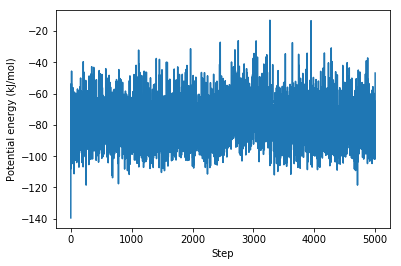

In [21]:
# Plot potential energies
# Time series
plt.plot(pe_list)
plt.xlabel('Step')
plt.ylabel('Potential energy (kJ/mol)')

Text(0.5,0,'Potential energy (kJ/mol)')

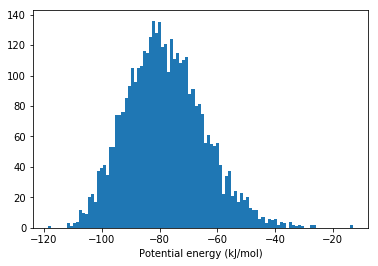

In [22]:
# Histgram
plt.hist(pe_list[1000:], bins=100)
plt.xlabel('Potential energy (kJ/mol)')

In [23]:
# Plot ramachandran plot
print(traj[1000 * 100:])
print(set(res.name for res in traj.top.residues))

pytraj.Trajectory, 400000 frames: 
Size: 0.196695 (GB)
<Topology: 22 atoms, 3 residues, 1 mols, non-PBC>
           
{'ACE', 'NME', 'ALA'}


In [24]:
phi, psi = pt.multidihedral(traj[1000 * 100:], resrange=[1], dihedral_types='psi phi')
phi, psi

(<pytraj.array.DataArray: size=400000, key=phi:2, dtype=float64, ndim=1> 
 values:
 [-97.14304007 -95.98206545 -95.87258717 ... -67.78829382 -74.65883682
  -61.10841529],
 <pytraj.array.DataArray: size=400000, key=psi:2, dtype=float64, ndim=1> 
 values:
 [-22.7596727  -28.55446255 -35.54331914 ... 149.30246583 143.08141808
  141.55310521])

(-180, 180)

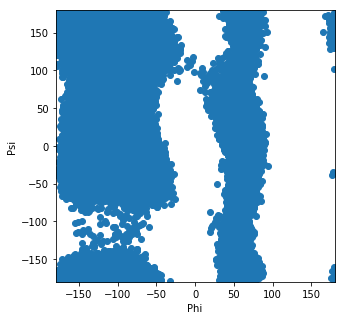

In [25]:
plt.figure(figsize=(5, 5))
plt.scatter(phi, psi)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.xlim(-180, 180)
plt.ylim(-180, 180)

(array([[ 4.,  3.,  1., ...,  4.,  4.,  4.],
        [ 6.,  4.,  3., ..., 20., 14., 11.],
        [21., 21.,  6., ..., 61., 35., 30.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  1., ...,  1.,  0.,  2.]]),
 array([-179.96716336, -176.36755815, -172.76795294, ...,  172.79414734,
         176.39375255,  179.99335776]),
 array([-179.99989279, -176.3998987 , -172.7999046 , ...,  172.7995286 ,
         176.39952269,  179.99951679]),
 <matplotlib.image.AxesImage at 0x1a3962db00>)

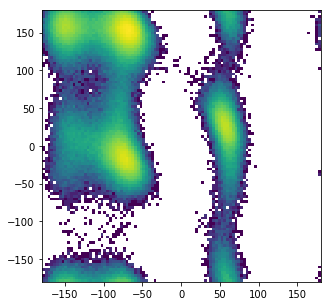

In [26]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(5, 5))
plt.hist2d(phi, psi, bins=100, norm=LogNorm())